# Model Optimization with LASSO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
Lasso_df = pd.read_csv('LASSO-data-set.csv')

In [4]:
Lasso_df

,strength,dexterity,constitution,wisdom,intelligence,charisma,weight,height,modifier1,modifier2,modifier3,modifier4,modifier5,modifier6,modifier7,modifier8,score
0,156,181,54,61,159,60,170,58,56,60,56,60,6,4,4,4,652.566513
1,148,137,89,147,159,79,166,84,47,44,53,49,11,10,5,8,413.145270
2,164,144,79,143,164,84,175,80,51,56,53,56,7,13,12,8,510.830805
3,176,53,84,178,198,85,180,88,37,38,40,36,5,5,0,5,392.261796
4,164,86,86,75,185,93,180,89,45,47,46,48,-1,2,-1,3,472.258696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,147,136,71,183,178,74,164,73,49,54,49,53,13,15,9,10,469.795129
996,180,155,67,162,163,67,173,62,27,22,28,23,5,2,9,7,402.313429
997,191,119,68,193,192,65,173,67,42,33,36,38,9,10,8,5,480.564293
998,160,167,70,92,162,69,175,72,58,64,64,63,1,-1,-1,1,642.229907


In [5]:
y = Lasso_df['strength']
X = Lasso_df.drop(columns='strength')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [34]:
hyper_test = sklearn.linear_model.LassoCV(alphas=[13], random_state=0).fit(X_train,y_train)
hyper_test.coef_

array([ 0.        ,  0.        , -0.        ,  0.02948639,  0.        ,
        0.63409044,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00143695])

Alphas set to 13 seems to be the magic number.

In [35]:
predictions = hyper_test.predict(X_test)

Text(0, 0.5, 'Predicted strength')

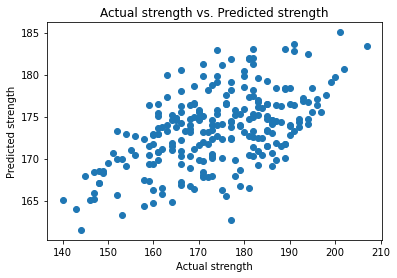

In [38]:
plt.scatter(y_test.values, predictions)
plt.title("Actual strength vs. Predicted strength")
plt.xlabel("Actual strength")
plt.ylabel("Predicted strength")

General trend upward and good variation.

Text(0, 0.5, 'Residuals')

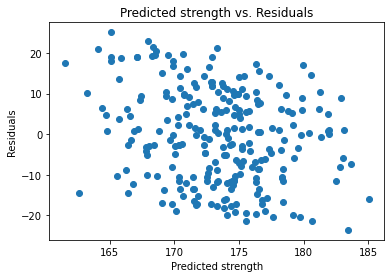

In [39]:
plt.scatter(predictions, predictions - y_test.values)
plt.title("Predicted strength vs. Residuals")
plt.xlabel("Predicted strength")
plt.ylabel("Residuals")

No identifiable pattern. Shows the model isn't overfitting.

In [43]:
print(f"Coefficient of determination and strength: {hyper_test.score(X_test,y_test):.4f}")

Coefficient of determination and strength: 0.2529


In [44]:
sklearn.metrics.median_absolute_error(y_test, predictions)

9.416347017154237

In [48]:
equation_of_best_fit = f'y = {hyper_test.intercept_:.2f} '

for index in range(0,len(hyper_test.coef_)):
    if index < len(hyper_test.coef_):
        equation_of_best_fit = equation_of_best_fit + f"+ {hyper_test.coef_[index]:.2f} x_{index} "
    else:
        equation_of_best_fit = equation_of_best_fit + f"+ {hyper_test.coef_[index]:.2f} x_{index}"
        
print(equation_of_best_fit)

y = 58.04 + 0.00 x_0 + 0.00 x_1 + -0.00 x_2 + 0.03 x_3 + 0.00 x_4 + 0.63 x_5 + 0.00 x_6 + -0.00 x_7 + -0.00 x_8 + -0.00 x_9 + -0.00 x_10 + 0.00 x_11 + 0.00 x_12 + 0.00 x_13 + 0.00 x_14 + 0.00 x_15 


All features were retained, as the original dataset had 16 features. If the zeroed features are removed, then only 2 features remain.

In [49]:
linear_test = LinearRegression().fit(X_train,y_train)

Text(0, 0.5, 'Predicted strength')

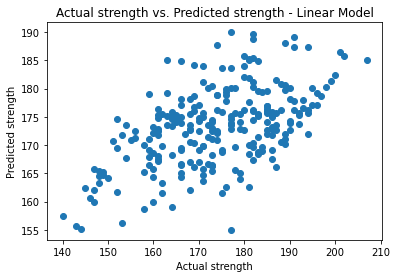

In [53]:
linear_predictions = linear_test.predict(X_test)

plt.scatter(y_test.values, linear_predictions)
plt.title("Actual strength vs. Predicted strength - Linear Model")
plt.xlabel("Actual strength")
plt.ylabel("Predicted strength")

Text(0, 0.5, 'Residuals')

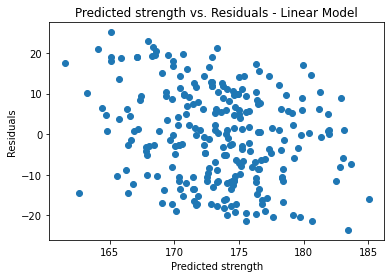

In [52]:
plt.scatter(predictions, predictions - y_test.values)
plt.title("Predicted strength vs. Residuals - Linear Model")
plt.xlabel("Predicted strength")
plt.ylabel("Residuals")

In [54]:
linear_test.score(X_test,y_test)

0.28842323363720146

In [56]:
sklearn.metrics.median_absolute_error(y_test, linear_predictions)

9.015201047874896

In [55]:
lin_equation_of_best_fit = f'y = {linear_test.intercept_:.2f} '

for index in range(0,len(linear_test.coef_)):
    if index < len(linear_test.coef_):
        lin_equation_of_best_fit = lin_equation_of_best_fit + f"+ {linear_test.coef_[index]:.2f} x_{index} "
    else:
        lin_equation_of_best_fit = lin_equation_of_best_fit + f"+ {linear_test.coef_[index]:.2f} x_{index}"
        
print(lin_equation_of_best_fit)

y = -41.16 + 0.01 x_0 + -0.14 x_1 + -0.00 x_2 + 0.03 x_3 + 0.12 x_4 + 3.34 x_5 + -2.95 x_6 + 0.17 x_7 + 0.01 x_8 + -0.04 x_9 + 3.43 x_10 + 0.33 x_11 + 0.05 x_12 + 0.13 x_13 + -4.58 x_14 + -0.60 x_15 


## Discussion on when to use Linear Regression or LASSO CV models

The Linear regression model is slightly more accurate, but requires the use of every feature. The LASSO CV model, once optimized with the correct alphas value, only required 2 features to accurately generate an optimized model. For smaller datasets, the Linear Regression model is ideal, as the degree of accuracy doesn't sacrifice time/computing cost; where as the for larger datasets,  the ideal model is Lasso CV, as you can remove unnecessary columns to speed up the model generation and reduce computing cost.